In [0]:
# Import the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Import uci molecular biology (promoter gene sequences) dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
columns = ['Class','id','Sequence'] # Naming the columns
genes = pd.read_csv(url,names = columns) # Reading the data


In [3]:
genes.head() # Displays first 5 rows of 'genes' dataframe

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [5]:
genes.shape # Prints the shape of 'genes'

(106, 3)

In [6]:
genes.nunique() # Prints number of unique elements in each column

Class         2
id          106
Sequence    106
dtype: int64

In [7]:
genes['Class'].unique() # Prints the unique elements in 'Class' column

array(['+', '-'], dtype=object)

In [0]:
# Removing '\t' in 'Sequence' column

for i in range(genes.shape[0]):
  genes['Sequence'][i] = genes['Sequence'][i].replace('\t', '')

  


In [9]:
# Checking the sequence and length of sequence of 5 randomly selected sequences.

for i in np.random.randint(0,106,5):
  print(genes['Sequence'][i])
  print(len(genes['Sequence'][i]))
  print('\n')


cgaccgaagcgagcctcgtcctcaatggcctctaaacgggtcttgaggggttttttg
57


ttgtcataatcgacttgtaaaccaaattgaaaagatttaggtttacaagtctacacc
57


gcaaataatcaatgtggacttttctgccgtgattatagacacttttgttacgcgttt
57


tccagtataatttgttggcataattaagtacgacgagtaaaattacatacctgcccg
57


tctcgtggatggacgttcaacattgaggaaggcataacgctactacctgatgtttac
57




In [0]:
# Initializing a dataframe 'nucleotide_sequence' of size (106,57)

nucleotide_sequence = pd.DataFrame(np.random.randn(106,57))

# Storing each base of 'Sequence' in 'nucleotide_sequence'

for i in range(genes.shape[0]):
  nucleotide_sequence.loc[i] = list(genes['Sequence'][i])

# Storing 'Class' column of 'Sequence' as a column in 'nucleotide_sequence'

nucleotide_sequence['Class'] = genes['Class']

In [11]:
nucleotide_sequence.head() # Displays first 5 rows of 'nucleotide_sequence' dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [12]:
nucleotide_sequence.shape

(106, 58)

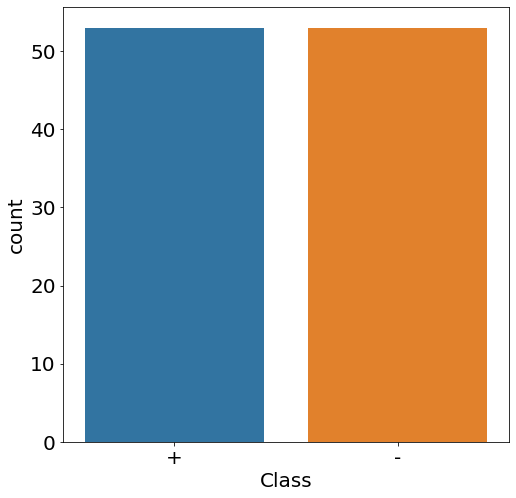

In [13]:
plt.figure(figsize=(8,8)) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.xlabel('Class',fontsize=20) 
plt.ylabel('count',fontsize=20) 
sns.countplot(nucleotide_sequence['Class']) # Displays count of each element in 'Class' column

In [14]:
print(nucleotide_sequence.describe())

          0    1    2    3    4    5    6  ...   51   52   53   54   55   56 Class
count   106  106  106  106  106  106  106  ...  106  106  106  106  106  106   106
unique    4    4    4    4    4    4    4  ...    4    4    4    4    4    4     2
top       t    a    a    c    a    a    a  ...    t    t    c    c    c    t     -
freq     38   34   30   30   36   42   38  ...   33   35   32   29   29   34    53

[4 rows x 58 columns]


In [0]:
# Switch to numerical data using pd.get_dummies() function

numerical_nucleotide = pd.get_dummies(nucleotide_sequence)

In [0]:
# Remove one of the class columns and rename the other to simply 'Class'

numerical_nucleotide.drop('Class_-',axis = 1,inplace = True)
numerical_nucleotide.rename(columns = {'Class_+':'Class'},inplace = True)

In [18]:
numerical_nucleotide.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,2_g,2_t,3_a,3_c,3_g,3_t,4_a,4_c,4_g,4_t,5_a,5_c,5_g,5_t,6_a,6_c,6_g,6_t,7_a,7_c,7_g,7_t,8_a,8_c,8_g,8_t,9_a,9_c,9_g,9_t,...,47_c,47_g,47_t,48_a,48_c,48_g,48_t,49_a,49_c,49_g,49_t,50_a,50_c,50_g,50_t,51_a,51_c,51_g,51_t,52_a,52_c,52_g,52_t,53_a,53_c,53_g,53_t,54_a,54_c,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1


In [19]:
numerical_nucleotide.shape

(106, 229)

In [20]:
# Snippet of code that serves the same purpose as get_dummies() function (Optional)

# Initialize the dataframe 'numerical_nucleotide' of shape (106,(57*4))

numerical_nucleotide1 = pd.DataFrame(np.random.randn(106,(57*4)))

# Define the dictionary 'key1'
key1 = {'a' : '1000','c' : '0100','g' : '0010','t' : '0001'}

# Assign values to 'numerical_nucleotide'

for i in range(nucleotide_sequence.shape[0]):
  temp1 = '' 
  for j in range(nucleotide_sequence.shape[1]-1):
    temp1 = temp1 + key1[nucleotide_sequence[j][i]]
  temp2 = [int(x) for x in list(temp1)]
  numerical_nucleotide1.iloc[i] = temp2

# Assign 'Class' column to 'numerical_nucleotide'

numerical_nucleotide1['Class'] = nucleotide_sequence['Class']

# Replace '+' and '-' of 'Class' column with values 1 and 0 respectively

numerical_nucleotide1.replace(to_replace = '+',value = 1,inplace = True)
numerical_nucleotide1.replace(to_replace = '-',value = 0,inplace = True)

print(numerical_nucleotide1)




       0    1    2    3    4    5    6  ...  222  223  224  225  226  227  Class
0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  1.0      1
1    0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0      1
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0      1
3    1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  1.0  0.0  0.0      1
4    0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0      1
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...
101  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0      0
102  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  0.0      0
103  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0      0
104  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0      0
105  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0      0

[106 rows x 229 columns]


In [0]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# X is input and y is output

X = numerical_nucleotide.drop('Class',axis = 1)
y = numerical_nucleotide['Class']

# Split into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [0]:
# Performance comparison of 9 classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection

In [0]:
# Defining the models

models = [KNeighborsClassifier(n_neighbors = 3),
          MLPClassifier(alpha = 1),
          DecisionTreeClassifier(max_depth = 5),
          RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
          AdaBoostClassifier(),
          GaussianNB(),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          SVC(kernel = 'sigmoid')]

# KFold cross validation technique is used

validation_type = model_selection.KFold(n_splits = 10)

# Calculation of cross validation scores

cv_result = []
for i in range(len(models)):
  cv_result.append(model_selection.cross_val_score(models[i],X_train,y_train,cv = validation_type,scoring = 'accuracy').mean())



In [24]:
# Creating a list of model names

model_names = ['K Nearest Neighbors','Neural Net','Decision Tree','Random Forest','AdaBoost','Naive Bayes','SVM Linear','SVM rbf','SVM Sigmoid']

# Cross validation scores of the models

for i in range(len(models)):
  print('The cross validation score of {} is {}'.format(model_names[i],cv_result[i]))

The cross validation score of K Nearest Neighbors is 0.7482142857142857
The cross validation score of Neural Net is 0.8232142857142858
The cross validation score of Decision Tree is 0.6464285714285715
The cross validation score of Random Forest is 0.6589285714285714
The cross validation score of AdaBoost is 0.8607142857142858
The cross validation score of Naive Bayes is 0.85
The cross validation score of SVM Linear is 0.8232142857142858
The cross validation score of SVM rbf is 0.6714285714285715
The cross validation score of SVM Sigmoid is 0.5589285714285714


In [0]:
# Test Set

In [26]:
for i in range(len(models)):
  a = models[i].fit(X_train,y_train) # Fitting the model
  y_predict = a.predict(X_test) # Predicting using trained model
  print(accuracy_score(y_predict,y_test))
  print(classification_report(y_predict,y_test))

0.8518518518518519
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.89      0.73      0.80        11

    accuracy                           0.85        27
   macro avg       0.86      0.83      0.84        27
weighted avg       0.86      0.85      0.85        27

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

0.7777777777777778
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.60      0.75        15

    accuracy                           0.78        27
   macro avg       0.83      0.80      0.77        27
weighted avg       0.85      0.7

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and bei